### Домашнее задание

In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Подберите скорость обучения (eta) и количество итераций

In [16]:
n = X.shape[0]

eta = 1e-2
n_iter = 1400

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 100 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [26.92778597  7.10095078], MSE = 201.46
Iteration #200: W_new = [36.55234278  5.3556858 ], MSE = 78.6
Iteration #300: W_new = [40.78354544  4.58842244], MSE = 52.71
Iteration #400: W_new = [42.77180005  4.22788312], MSE = 46.47
Iteration #500: W_new = [43.76430815  4.04790708], MSE = 44.77
Iteration #600: W_new = [44.28770223  3.95299763], MSE = 44.25
Iteration #700: W_new = [44.57781114  3.90039085], MSE = 44.08
Iteration #800: W_new = [44.74605536  3.86988236], MSE = 44.02
Iteration #900: W_new = [44.84771779  3.85144744], MSE = 43.99
Iteration #1000: W_new = [44.91148301  3.8398846 ], MSE = 43.98
Iteration #1100: W_new = [44.95285668  3.83238213], MSE = 43.97
Iteration #1200: W_new = [44.98054088  3.82736202], MSE = 43.97
Iteration #1300: W_new = [44.99959036  3.82390769], MSE = 43.97


In [38]:
from itertools import product
def gradient_iterator(eta_list, iter_list, X, y):
    n = X.shape[0]
    array_for_return = []
    for eta, n_iter in product(eta_list, iter_list):        
        W = np.array([1, 0.5])
        for i in range(n_iter):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
        print(f'Learning cycle ended with: eta={eta}, n_iter={n_iter},  W = {W}, MSE = {round(err,2)}')
        array_for_return.append([eta, n_iter, err])    
    return np.array(array_for_return)

In [18]:
eta_list = [10**x for x in range(-2, -6, -1)]
iter_list = [x for x in range(1000, 10000, 1000)]

In [39]:
arr = gradient_iterator(eta_list, iter_list, X, y)

Learning cycle ended with: eta=0.01, n_iter=1000,  W = [45.05808274  3.813301  ], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=2000,  W = [45.06249954  3.81250008], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=3000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=4000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=5000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=6000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=7000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=8000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.01, n_iter=9000,  W = [45.0625  3.8125], MSE = 43.97
Learning cycle ended with: eta=0.001, n_iter=1000,  W = [28.16575062  6.87646498], MSE = 178.68
Learning cycle ended with: eta=0.001, n_iter=2000,  W = [38.27751127  5.04285309], MSE = 65.69
Learning cycle ende

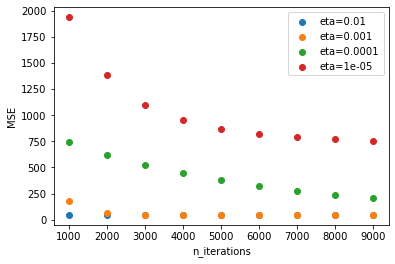

In [49]:
plt.figure()
for eta in eta_list:
    plt.scatter(arr[np.where(arr[:,0] == eta)][:,1], arr[np.where(arr[:,0] == eta)][:,2], label=f'eta={eta}')
plt.xlabel('n_iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

Процесс вычисления можно ускорить, если ввести условие выхода из алгоритма в том случае, если веса практически перестают меняться. 

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [63]:
w = np.array([1, 0.5])
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))) # без ошибки
    if i % 100 == 0:
        print(i, w, err)

0 [1.00108 0.50377] 3047.75
100 [1.10784278 0.87404777] 2899.1535690971787
200 [1.2122116  1.23132281] 2760.529028353393
300 [1.31426783 1.57604372] 2631.200648160572
400 [1.41409007 1.90864366] 2510.5385007204704
500 [1.51175417 2.22954084] 2397.9553555179523
600 [1.6073334  2.53913904] 2292.9037852245647
700 [1.70089847 2.83782813] 2194.873467769061
800 [1.79251769 3.12598453] 2103.388671278333
900 [1.88225698 3.40397167] 2018.005909493475
1000 [1.97018001 3.67214046] 1938.3117561058734


Пример из ноутбука

In [5]:
n = X.shape[0]

eta = 1e-2 
n_iter = 1400

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [65]:
n = X.shape[0]

eta = 1e-2 
n_iter = 10000
eps = 1e-6
break_exit = False

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    W_prev = W.copy()
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    
    if np.linalg.norm(W - W_prev, ord=2) < eps:
        print(f'Learning cycle ends at step #{i}: W = {W}, MSE = {round(err,2)}')
        break_exit = True
        break
if not break_exit:
    print(f'Learning cycle ended without break: W = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

Потребуется 1406 итераций